# AS4PA Sixth set of exercises:

Gaudio Raffaele (2057974)

Delivery: 05/06/2022

In [357]:
# importing cell

library("ggplot2")
library("gridExtra")

#installing this two guys on a mac with arm-64 processor and make they run on a jupyter-notebook was a nightmare!
library("coda")
library("rjags") 


In [358]:
cl.func<-function(p,cumsum.area,cl){
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if((cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)){
                    x1 <- (p[i]+p[i+1])/2
                }
                if((cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)){
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

cl.func.discr <- function(p,cumsum.area,cl){
                    x1 <- NULL
                    x2 <- NULL
                    for(i in 1:(length(cumsum.area)-1)){
                        cl1 <- (1-cl)/2
                        cl2 <- cl+(1-cl)/2
                        if((cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)){
                            x1 <-  p[i] 
                            area.1 <- cumsum.area[i]
                        }
                        if((cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)){
                            x2 <- p[i+1] 
                            area.2 <- 1 - cumsum.area[i+1]
                        }            
                    }
                    return(c(x1,x2,area.1,area.2))
                }

### Exercise 1

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.

A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.

a) what is the probability distribution of y, the number of times the new method fails to detect the disease?

b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method?

c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance

d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

e) Perform the same hypothesis test in the classical frequentist way.

In [359]:
# a) what is the probability distribution of y, the number of times the new method fails to detect the disease?

# y follows a binomial distribution


In [360]:
# b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. 
# What is the frequentist estimator of the failure probability of the new method?

n<-75
Y<-6

p.freq<-Y/n

mean.freq<-p.freq
var.freq<-(p.freq*(1-p.freq))/n

cat("Frequentist estimator:\t",p.freq,"\n")
cat("Expected value:\t\t",mean.freq,"\n")
cat("Variance:\t\t", var.freq)



Frequentist estimator:	 0.08 
Expected value:		 0.08 
Variance:		 0.0009813333

Parameters of the Beta prior: 
Alpha: 0.8257653 
Beta: 4.679337 
0.08478674

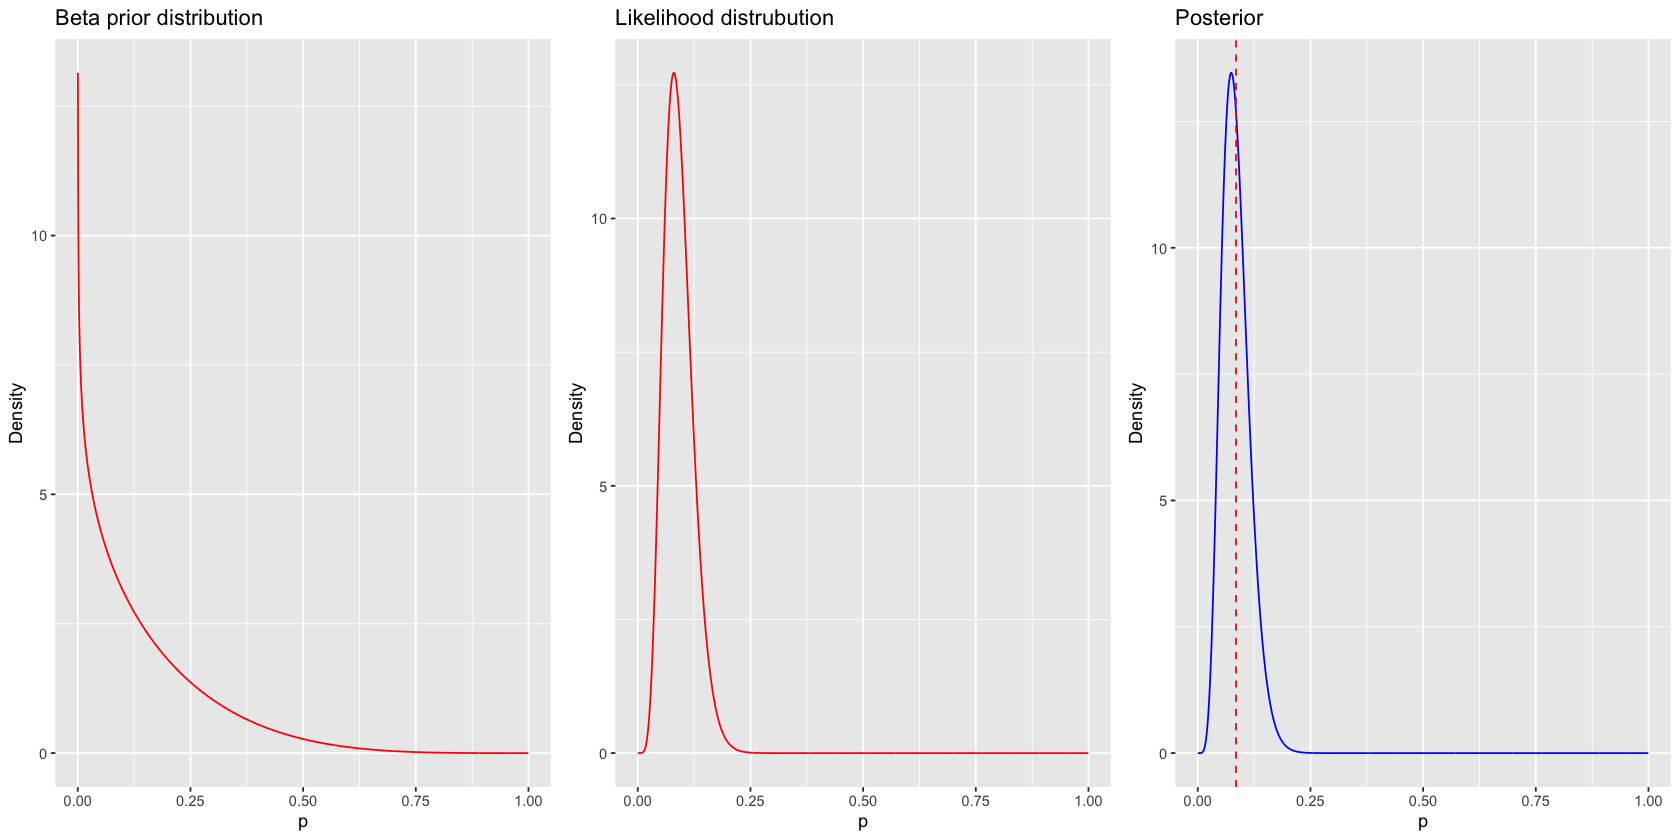

In [361]:
# c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. 
# Plot the posterior distribution for y, and mark on the plot the mean value and variance

n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

#prior
beta.mean<-0.15
beta.std<-0.14

alpha<-((1-beta.mean)/(beta.std^2)-(1/beta.mean))*beta.mean^2
beta<-alpha*((1/beta.mean)-1)

cat("Parameters of the Beta prior: \n")
cat("Alpha:",alpha,"\n")
cat("Beta:",beta,"\n")

beta.prior<-dbeta(p,alpha,beta)
beta.prior<-beta.prior/(delta.p*sum(beta.prior))

#likliehood
p.like<-dbinom(Y,n,p)  ## Y
p.like<-p.like/(delta.p*sum(p.like))

#posterior
posterior<-beta.prior*p.like
posterior<-posterior/(delta.p*sum(posterior))
post.mean <- delta.p*sum(p*posterior)

options(repr.plot.width=14, repr.plot.height=7)
fig1<-ggplot()+
        geom_line(aes(p,beta.prior),color="red")+
        labs(title="Beta prior distribution",y="Density")

fig2<-ggplot()+
        geom_line(aes(p,p.like),color="red")+
        labs(title="Likelihood distrubution",y="Density")

fig3<-ggplot()+
        geom_line(aes(p,posterior),color="blue")+
        geom_vline(xintercept = post.mean,color="red",linetype="dashed")+
        labs(title="Posterior",y="Density")

grid.arrange(fig1,fig2,fig3,nrow=1,ncol=3)
cat(post.mean)

Bayesian estimator:	 0.08478674 
Expected value:		 0.08478674 
Variance:		 0.0009815899

 * Confidance Level = 0.95: 
x1 = 0.0345 	 x2 = 0.154 

The new test performs better than the old test.

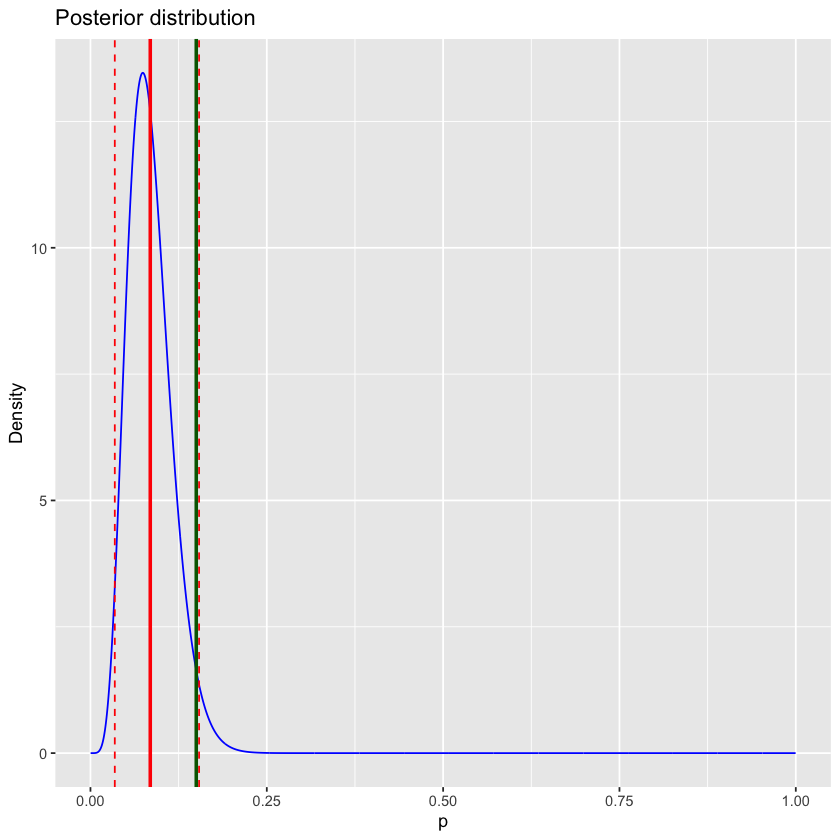

In [362]:
# d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal 
# than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

p.bayes<-post.mean
var.bayes<-(1/(n+2))**2 * n * p.bayes * (1-p.bayes)

cat("Bayesian estimator:\t",p.bayes,"\n")
cat("Expected value:\t\t",post.mean,"\n")
cat("Variance:\t\t", var.bayes)
cat("\n")

cl=0.95
area.post<-delta.p*cumsum(posterior)
x.post<-cl.func(p,area.post,cl)

cat("\n * Confidance Level = 0.95: \n")
cat("x1 =",x.post[1], "\t x2 =",x.post[2],"\n")
cat("\n")

output<-function(Y){
            if(Y>=0.15){
                cat("The new test performs worse than the old test.")
            }
            else{
                cat("The new test performs better than the old test.")
            }
        }

output(p.bayes)

options(repr.plot.width=7, repr.plot.height=7)
ggplot()+
    geom_line(aes(p,posterior),color="blue")+
    geom_vline(xintercept = x.post[1],color="red",linetype="dashed")+
    geom_vline(xintercept = x.post[2],color="red",linetype="dashed")+
    geom_vline(xintercept = p.bayes,color="red",lwd=1)+
    geom_vline(xintercept = 0.15,color="darkgreen",lwd=1)+
    labs(title="Posterior distribution",x="p",y="Density")


Frequentist estimator:	 0.08 
Expected value:		 0.08 
Variance:		 0.0009813333

 * Confidance Level = 0.95: 
x1 = 1 	 x2 = 11 
area 1: 0.01446789 
area 2: 0.01566142 
alpha: 0.03012931 

The new test performs better than the old test.

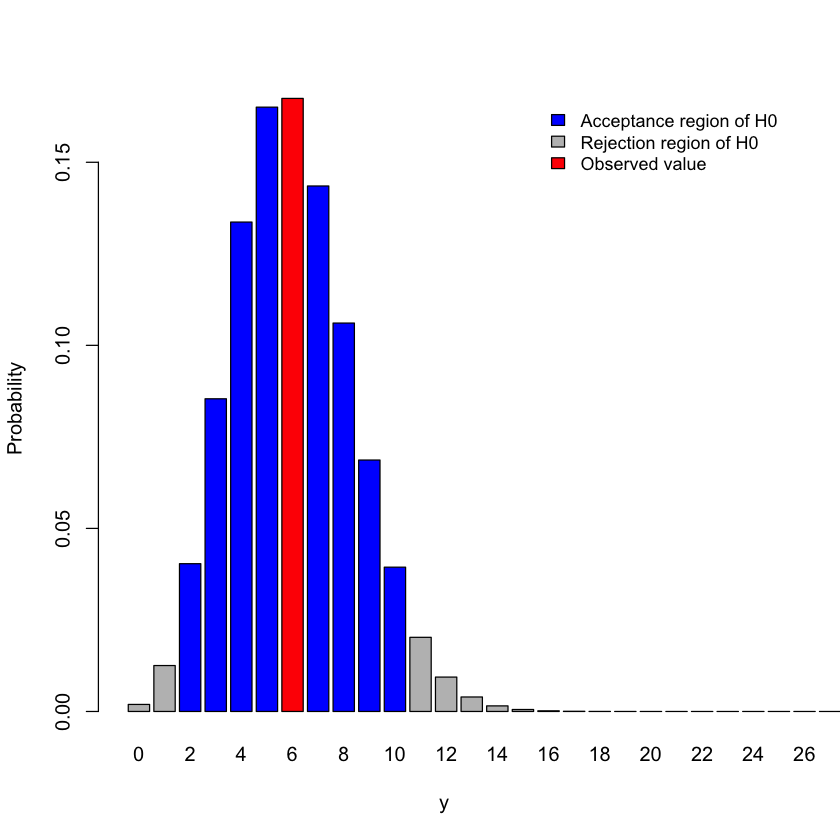

In [363]:
# e) Perform the same hypothesis test in the classical frequentist way.

p.H0<-p.freq
y<-seq(0,n)

H0<-dbinom(y,n,p.H0)
area.H0<-cumsum(H0)

cl<-0.95
x.H0<-cl.func.discr(y,area.H0,cl)

cat("Frequentist estimator:\t",p.freq,"\n")
cat("Expected value:\t\t",mean.freq,"\n")
cat("Variance:\t\t", var.freq)
cat("\n")

cat("\n * Confidance Level = 0.95: \n")
cat("x1 =",x.H0[1], "\t x2 =",x.H0[2],"\n")
cat("area 1:", x.H0[3],"\n")
cat("area 2:", x.H0[4],"\n")
cat("alpha:",x.H0[3]+x.H0[4],"\n")
cat("\n")

output<-function(Y){
            if(Y>=0.15){
                cat("The new test performs worse than the old test.")
            }
            else{
                cat("The new test performs better than the old test.")
            }
        }

output(p.H0)

cols<-c("blue","grey")
pos <- (y <=x.H0[1] | y>=x.H0[2])

options(repr.plot.width=7, repr.plot.height=7)
barplot(H0,names=y,xlim=c(0,30),col=ifelse(y==6,"red",cols[pos+1]),xlab="y",ylab="Probability")
legend("topright",legend=c("Acceptance region of H0","Rejection region of H0","Observed value"),
       fill=c("blue","grey","red"),cex=0.9,box.lty=0)

### Exercise 2

Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.

Considering the following to sets of observations taken over a fixed large time interval in two different corps:

| y death soldiers | 0 | 1 | 2 | 3 | 4 | ≥5 |
| --- | --- | --- | --- | --- | --- | --- |
| n1 observation | 109 | 64 | 22 | 3 | 1 | 0 |
| n2 observation | 144 | 91 | 32 | 11 | 2 | 0 |


a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

b) assuming now a Jeffrey's prior

$$
g(\lambda)∝1/\sqrt{\lambda}
$$
with $\lambda \ge 0$

compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

Lambda hat:	 39.91667 
Lambda hat std:  1.823839 


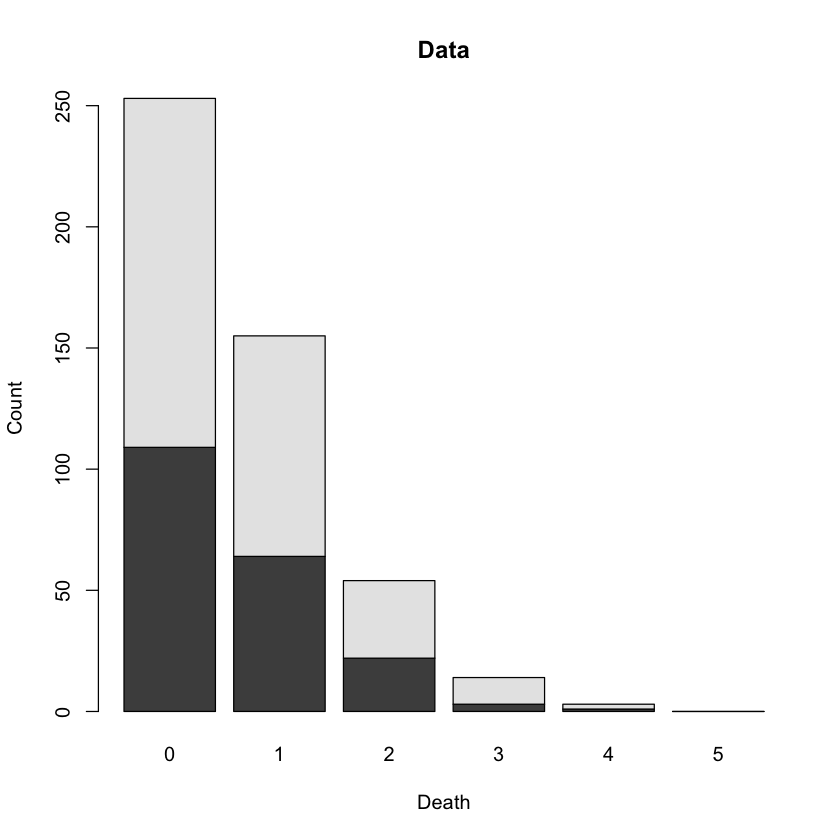

In [364]:
death<-seq(0,5,1)
ob.one<-c(109,64,22,3,1,0)
ob.two<-c(144,91,32,11,2,0)

obs<-rbind(ob.one,ob.two)
sum.obs<-sum(obs)
n.obs<-length(obs)

lambda.hat<-mean(obs)
lambda.hat.std<-sqrt(lambda.hat/n.obs)

cat("Lambda hat:\t",lambda.hat,"\n")
cat("Lambda hat std: ",lambda.hat.std,"\n")

barplot(obs,name=death,xlab="Death",ylab="Count",main="Data")

* Confidance level: 0.95:
lambda 1: 36.47949 
lambda 2: 43.52551 

Lambda mean value: 40 
Lambda std: 3.333333 


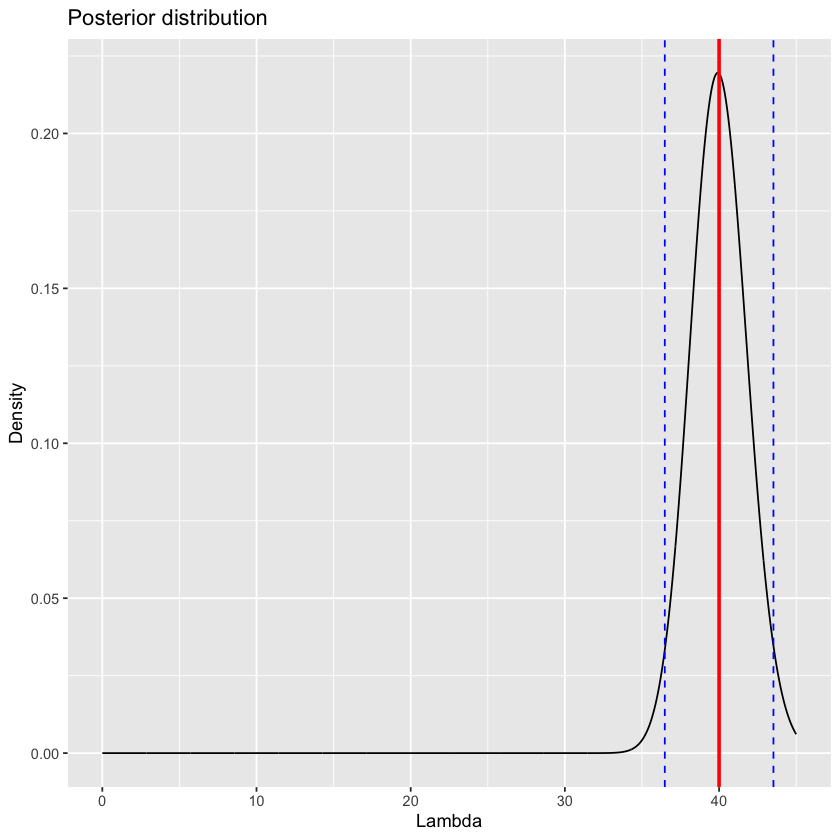

In [365]:
# a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. 
# Determine the posterior mean, median and variance, and compute the 95% credibility interval.

n.sample<-2000
lambda<-seq(0,45,length.out=n.sample)
delta.lambda<-lambda[2]-lambda[1]

# Posterior

alpha<-sum.obs+1
beta<-n.obs
unif.post<-dgamma(x=lambda,alpha,beta)
unif.post<-unif.post/(delta.lambda*sum(unif.post))

mean.post<-alpha/beta
mean.std<-alpha/beta^2

cl<-0.95
post.area<-delta.lambda*cumsum(unif.post)

lambda.post<-cl.func(lambda,post.area,cl)
cat("* Confidance level: 0.95:\n")
cat("lambda 1:",lambda.post[1],"\n")
cat("lambda 2:",lambda.post[2],"\n")
cat("\n")

cat("Lambda mean value:",mean.post,"\n")
cat("Lambda std:", mean.std,"\n")

ggplot()+
    geom_line(aes(lambda,unif.post))+
    geom_vline(xintercept=mean.post,color="red",lwd=1)+
    geom_vline(xintercept=lambda.post[1],color="blue",linetype="dashed")+
    geom_vline(xintercept=lambda.post[2],color="blue",linetype="dashed")+
    labs(title="Posterior distribution",x="Lambda",y="Density")



* Confidance level: 0.95:
lambda 1: 36.45698 
lambda 2: 43.48049 

Lambda mean value: 40 
Lambda std: 3.333333 


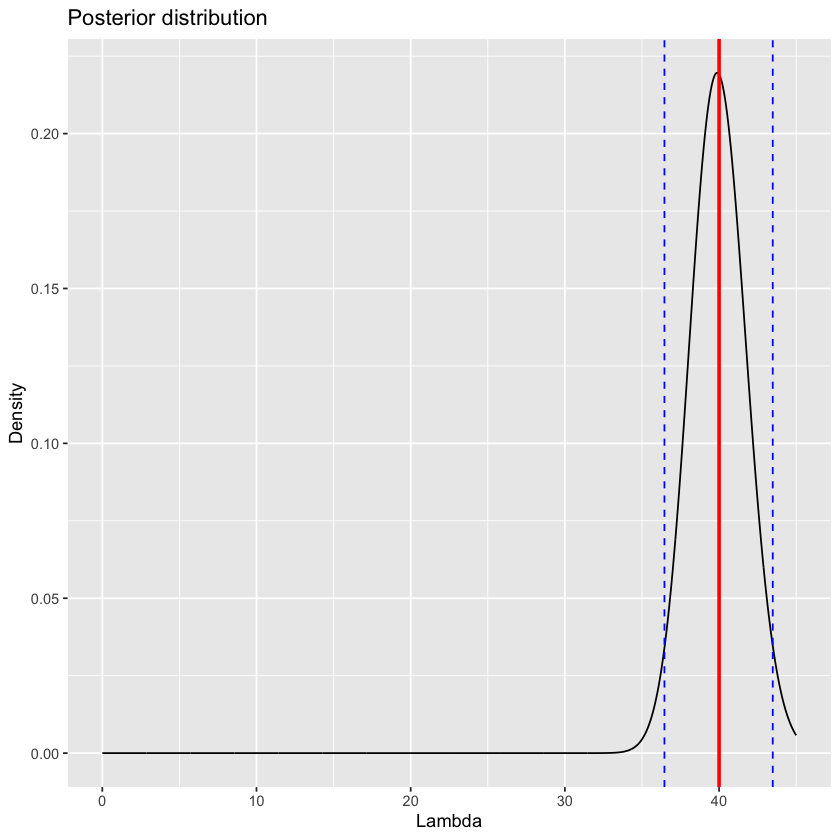

In [366]:
# b) assuming now a Jeffreys’ prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. 
# Determine the posterior mean, median and variance, and compute the 95% credibility interval.

alpha.jeff<-sum(obs)+1/2

jeff.post<-dgamma(lambda,alpha.jeff,beta)
jeff.post<-jeff.post/(delta.lambda*sum(jeff.post))

mean.post<-alpha/beta
mean.std<-alpha/beta^2

cl<-0.95
post.area<-delta.lambda*cumsum(jeff.post)

lambda.post<-cl.func(lambda,post.area,cl)
cat("* Confidance level: 0.95:\n")
cat("lambda 1:",lambda.post[1],"\n")
cat("lambda 2:",lambda.post[2],"\n")
cat("\n")

cat("Lambda mean value:",mean.post,"\n")
cat("Lambda std:", mean.std,"\n")

ggplot()+
    geom_line(aes(lambda,jeff.post))+
    geom_vline(xintercept=mean.post,color="red",lwd=1)+
    geom_vline(xintercept=lambda.post[1],color="blue",linetype="dashed")+
    geom_vline(xintercept=lambda.post[2],color="blue",linetype="dashed")+
    labs(title="Posterior distribution",x="Lambda",y="Density")





### Exercise 3

A study on water quality of streams, a high level of bacter $X$ was defined as a level greater than 100 per 100 ml of stream water. $n = 116$ samples were taken from streams having a high environmental impact on pandas. Out of these, $y = 11$ had a high bacter $X$ level.

Indicating with $p$ the probability that a sample of water taken from the stream has a high bacter $X$ level,

a) find the frequentist estimator for $p$

b) using a $Beta(1,10)$ prior for $p$, calculate and posterior distribution $P(p|y)$

c) find the bayesian estimator for $p$, the posterior mean and variance, and a 95% credible interval

d) test the hypotesis

$$
H_{0}:p=0.1 \;\; versus  \;\; H_{1}:p \ne 0.1
$$

at 5% level of significance with both the frequentist and bayesian approach

A new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter $X$ level

e) find the frequentist estimator for $p$

f) find a bayesian estimator for $p$, assuming both a $Beta(1,10)$ prior for $p$, and assuming the posterior
probability of the older measurement as the prior for the new one.

g) find the bayesian estimator for $p$, the posterior mean and variance, and a 95% credible interval

h) test the hypotesis

$$
H_{0}:p=0.1 \;\; versus \;\; H_{1}:p \ne 0.1
$$

at 5% level of significance with both the frequentist and bayesian approach


In [367]:
# a) find the frequentist estimator for p

n<-116
Y<-11

p.freq<-Y/n

#this is a binomial process

mean.freq<-p.freq
var.freq<-(p.freq*(1-p.freq))/n

cat("Frequentist estimator:\t",p.freq,"\n")
cat("Expected value:\t\t",mean.freq,"\n")
cat("Variance:\t\t", var.freq)

Frequentist estimator:	 0.09482759 
Expected value:		 0.09482759 
Variance:		 0.0007399596

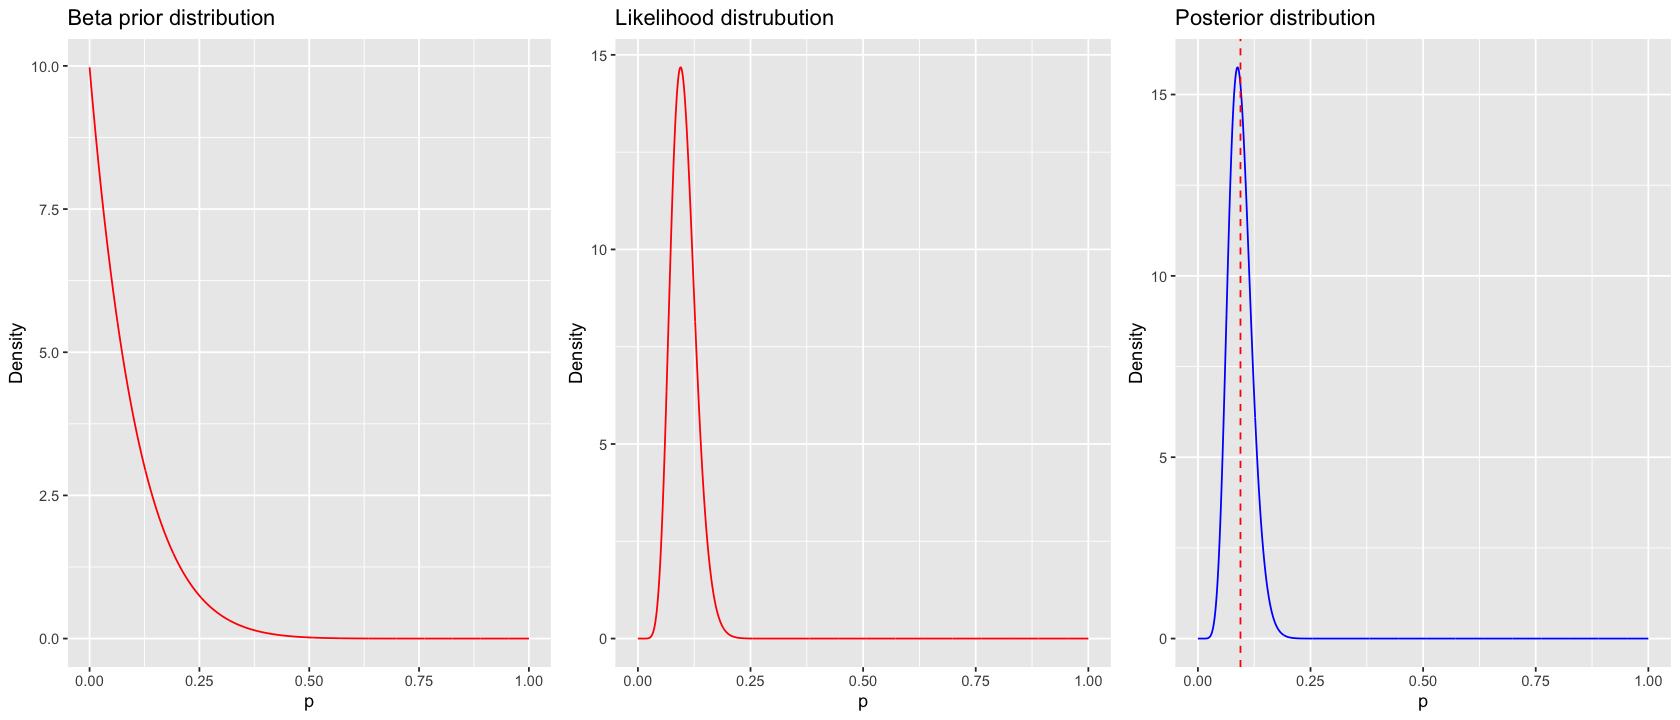

In [368]:
# b) using a Beta(1,10) prior for p, calculate and posterior distribution P(p|y)

n.sample <- 2000
p <- seq(0,1,length.out=n.sample)
delta.p <- p[2]-p[1]

#prior
beta.prior<-dbeta(p,1,10)
beta.prior<-beta.prior/(delta.p*sum(beta.prior))

#likelihood
p.like<-dbinom(Y,n,p)  ## Y
p.like<-p.like/(delta.p*sum(p.like))

#posterior
posterior<-beta.prior*p.like
posterior<-posterior/(delta.p*sum(posterior))
post.mean <- delta.p*sum(p*posterior)


fig1<-ggplot()+
        geom_line(aes(p,beta.prior),color="red")+
        labs(title="Beta prior distribution",x="p",y="Density")

fig2<-ggplot()+
        geom_line(aes(p,p.like),color="red")+
        labs(title="Likelihood distrubution",x="p",y="Density")

fig3<-ggplot()+
        geom_line(aes(p,posterior),color="blue")+
        geom_vline(xintercept = post.mean,color="red",linetype="dashed")+
        labs(title="Posterior distribution",x="p",y="Density")

options(repr.plot.width=14, repr.plot.height=6)
grid.arrange(fig1,fig2,fig3,nrow=1,ncol=3)



In [369]:
new.prior<-posterior # for point f)

Bayesian estimator:	 0.09448819 
Expected value:		 0.09448819 
Variance:		 0.0007127966

 * Confidance Level = 0.95: 
x1 = 0.04977489 	 x2 = 0.1508254 


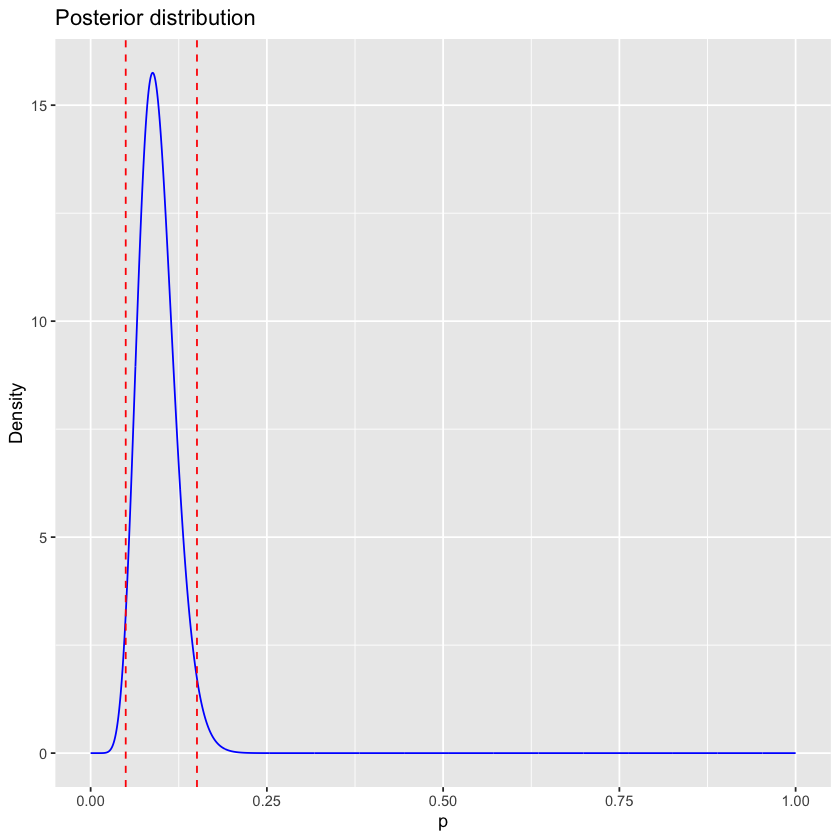

In [370]:
# c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

p.bayes<-post.mean
var.bayes<-(1/(n+2))^2 * n * p.bayes * (1-p.bayes)

cat("Bayesian estimator:\t",p.bayes,"\n")
cat("Expected value:\t\t",post.mean,"\n")
cat("Variance:\t\t", var.bayes)
cat("\n")

cl=0.95
area.post<-delta.p*cumsum(posterior)
x.post<-cl.func(p,area.post,cl)

cat("\n * Confidance Level = 0.95: \n")
cat("x1 =",x.post[1], "\t x2 =",x.post[2],"\n")

options(repr.plot.width=7, repr.plot.height=7)
ggplot()+
    geom_line(aes(p,posterior),color="blue")+
    geom_vline(xintercept = x.post[1],color="red",linetype="dashed")+
    geom_vline(xintercept = x.post[2],color="red",linetype="dashed")+
    labs(title="Posterior distribution",x="p",y="Density")


 * Confidance Level = 0.95: 
x1 = 5 	 x2 = 18 
area 1: 0.02092518 
area 2: 0.02161829 
alpha: 0.04254348 

The null hypotesis H0 is accepted.

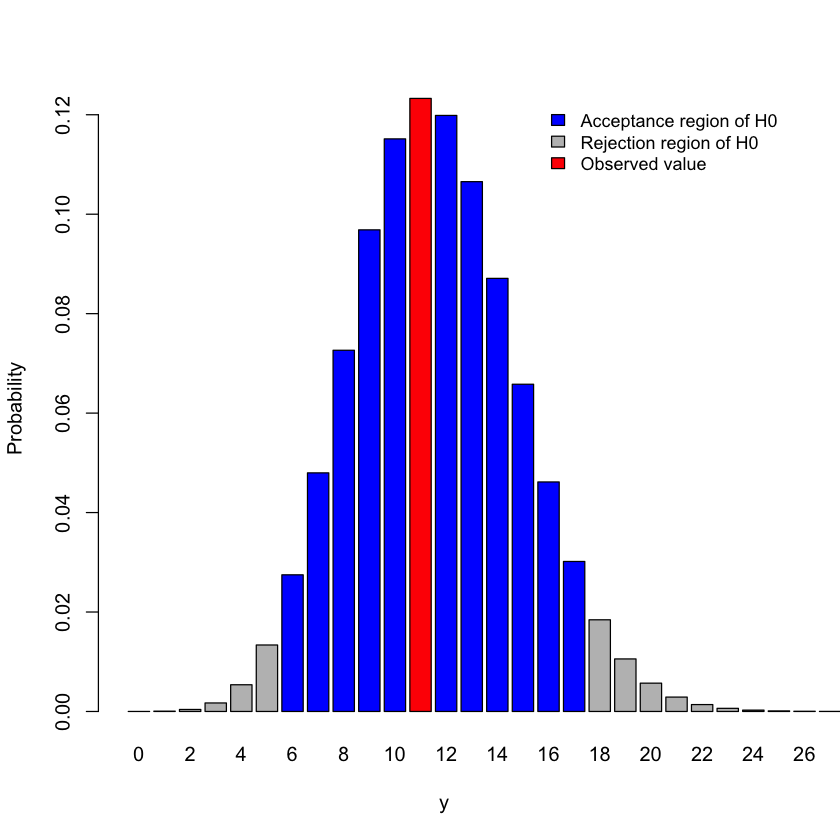

In [371]:
# d) test the hypotesis H0 vs H1 at 5% level of significance with both the frequentist and bayesian approach

#frequentist approach

p.H0<-0.1
y<-seq(0,n)

H0<-dbinom(y,n,p.H0)
area.H0<-cumsum(H0)

cl<-0.95
x.H0<-cl.func.discr(y,area.H0,cl)

cat("\n * Confidance Level = 0.95: \n")
cat("x1 =",x.H0[1], "\t x2 =",x.H0[2],"\n")
cat("area 1:", x.H0[3],"\n")
cat("area 2:", x.H0[4],"\n")
cat("alpha:",x.H0[3]+x.H0[4],"\n")
cat("\n")


output.freq<-function(Y){
            if(Y>x.H0[1] & Y<x.H0[2]){
                cat("The null hypotesis H0 is accepted.")
            }
            else{
                cat("The null hypotesis H0 is rejected.")
            }
        }

output.freq(Y)

cols<-c("blue","grey")
pos <- (y <=x.H0[1] | y>=x.H0[2])

barplot(H0,names=y,xlim=c(0,30),col=ifelse(y==11,"red",cols[pos+1]),xlab="y",ylab="Probability")
legend("topright",legend=c("Acceptance region of H0","Rejection region of H0","Observed value"),
       fill=c("blue","grey","red"),cex=0.9,box.lty=0)


 * Confidance Level = 0.95: 
x1 = 0.04977489 	 x2 = 0.1508254 

The null hypotesis H0 is accepted.

Warning message:
“Removed 1460 row(s) containing missing values (geom_path).”


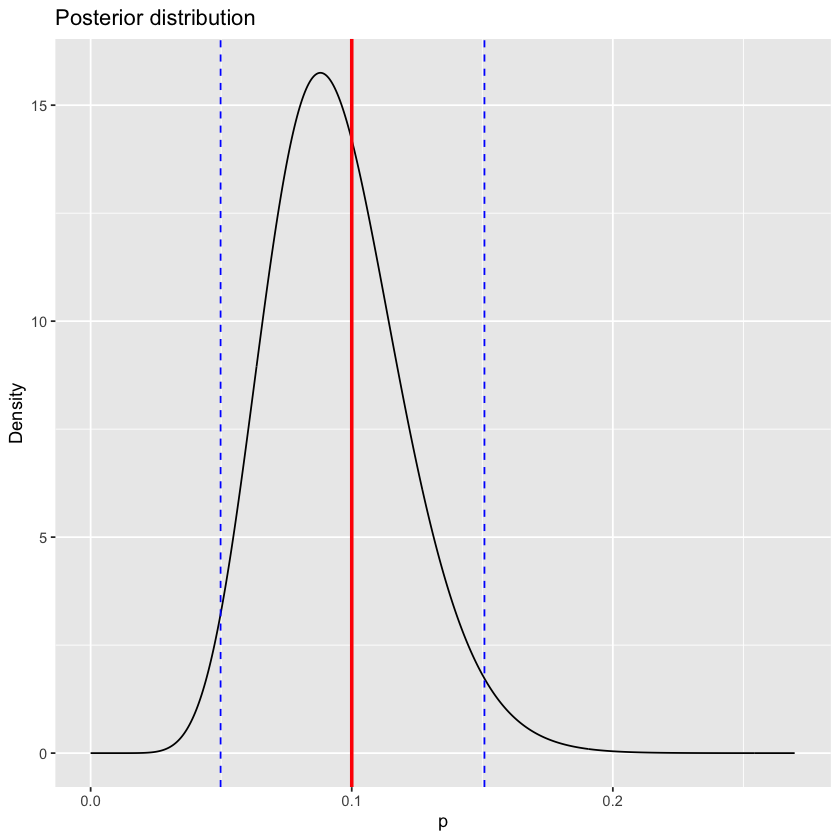

In [372]:
#bayesian approach

cat("\n * Confidance Level = 0.95: \n")
cat("x1 =",x.post[1], "\t x2 =",x.post[2],"\n")
cat("\n")

output.bayes<-function(Y){
            if(Y>x.post[1] & Y<x.post[2]){
                cat("The null hypotesis H0 is accepted.")
            }
            else{
                cat("The null hypotesis H0 is rejected.")
            }
        }

output.bayes(p.H0)

options(repr.plot.width=7, repr.plot.height=7)
ggplot()+
    geom_line(aes(p,posterior))+
    geom_vline(xintercept = x.post[1],color="blue",linetype="dashed")+
    geom_vline(xintercept = x.post[2],color="blue",linetype="dashed")+
    geom_vline(xintercept = p.H0,color="red",lwd=1)+
    xlim(0,0.27)+
    labs(title="Posterior distribution",x="p",y="Density")

A new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter $X$ level


In [373]:
# e) find the frequentist estimator for p

n<-165
Y<-9

p.freq<-Y/n

mean.freq<-p.freq
var.freq<-(p.freq*(1-p.freq))/n

cat("Frequentist estimator:\t",p.freq,"\n")
cat("Expected value:\t\t",mean.freq,"\n")
cat("Variance:\t\t", var.freq)

Frequentist estimator:	 0.05454545 
Expected value:		 0.05454545 
Variance:		 0.000312547

Prior:			 Beta(1,10)
Bayesian estimator:	 0.05681818 
Expected value:		 0.05681818 
Variance:		 0.0003170544

 * Confidance Level = 0.95: 
x1 = 0.02726363 	 x2 = 0.09529765 


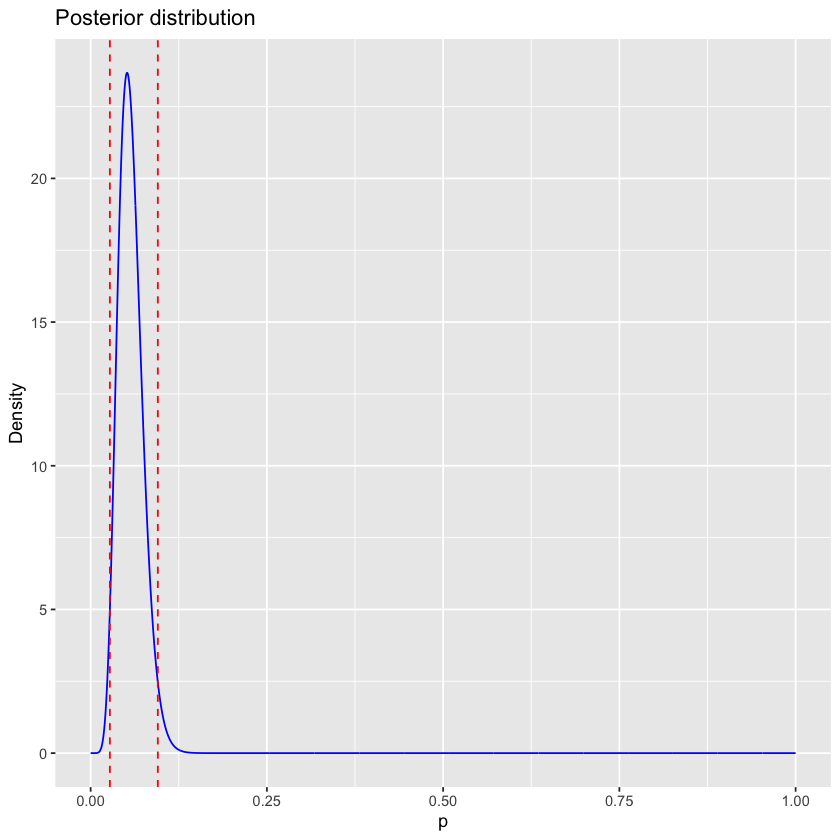

In [374]:
# f) find a bayesian estimator for p, assuming both a Beta(1,10) prior for p, and assuming the posterior
# probability of the older measurement as the prior for the new one.

# g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval.


# assuming Beta(1,10) prior

#prior
beta.prior<-dbeta(p,1,10)
beta.prior<-beta.prior/(delta.p*sum(beta.prior))

#likelihood
p.like<-dbinom(Y,n,p)
p.like<-p.like/(delta.p*sum(p.like))

#posterior
posterior<-beta.prior*p.like
posterior<-posterior/(delta.p*sum(posterior))
post.mean <- delta.p*sum(p*posterior)


p.bayes<-post.mean
var.bayes<-(1/(n+2))**2 * n * p.bayes * (1-p.bayes)

cat("Prior:\t\t\t Beta(1,10)\n")
cat("Bayesian estimator:\t",p.bayes,"\n")
cat("Expected value:\t\t",post.mean,"\n")
cat("Variance:\t\t", var.bayes)
cat("\n")

cl=0.95
area.post<-delta.p*cumsum(posterior)
x.post<-cl.func(p,area.post,cl)

cat("\n * Confidance Level = 0.95: \n")
cat("x1 =",x.post[1], "\t x2 =",x.post[2],"\n")

options(repr.plot.width=7, repr.plot.height=7)
ggplot()+
    geom_line(aes(p,posterior),color="blue")+
    geom_vline(xintercept = x.post[1],color="red",linetype="dashed")+
    geom_vline(xintercept = x.post[2],color="red",linetype="dashed")+
    labs(title="Posterior distribution",x="p",y="Density")

Prior:			 Old Posterior
Bayesian estimator:	 0.07191781 
Expected value:		 0.07191781 
Variance:		 0.000394888

 * Confidance Level = 0.95: 
x1 = 0.04477239 	 x2 = 0.1038019 


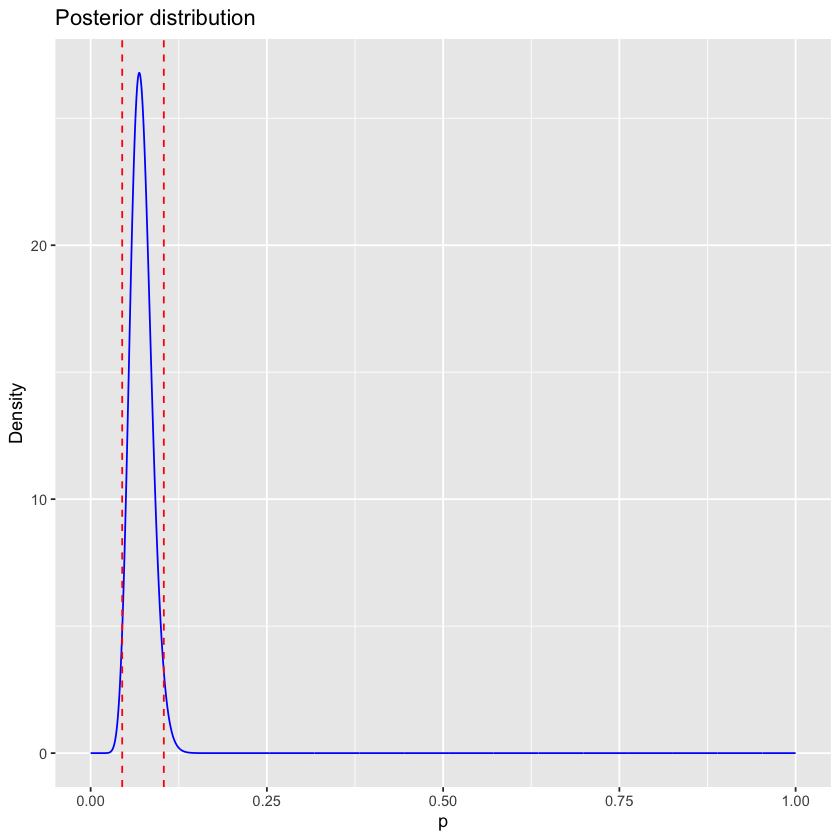

In [375]:
# assuming the previous posterior as new prior

#posterior
posterior<-new.prior*p.like
posterior<-posterior/(delta.p*sum(posterior))
post.mean <- delta.p*sum(p*posterior)


p.bayes<-post.mean
var.bayes<-(1/(n+2))**2 * n * p.bayes * (1-p.bayes)

cat("Prior:\t\t\t Old Posterior\n")
cat("Bayesian estimator:\t",p.bayes,"\n")
cat("Expected value:\t\t",post.mean,"\n")
cat("Variance:\t\t", var.bayes)
cat("\n")

cl=0.95
area.post<-delta.p*cumsum(posterior)
x.post<-cl.func(p,area.post,cl)

cat("\n * Confidance Level = 0.95: \n")
cat("x1 =",x.post[1], "\t x2 =",x.post[2],"\n")

options(repr.plot.width=7, repr.plot.height=7)
ggplot()+
    geom_line(aes(p,posterior),color="blue")+
    geom_vline(xintercept = x.post[1],color="red",linetype="dashed")+
    geom_vline(xintercept = x.post[2],color="red",linetype="dashed")+
    labs(title="Posterior distribution",x="p",y="Density")


 * Confidance Level = 0.95: 
x1 = 8 	 x2 = 24 
area 1: 0.01290585 
area 2: 0.0236551 
alpha: 0.03656096 

The null hypotesis H0 is accepted.

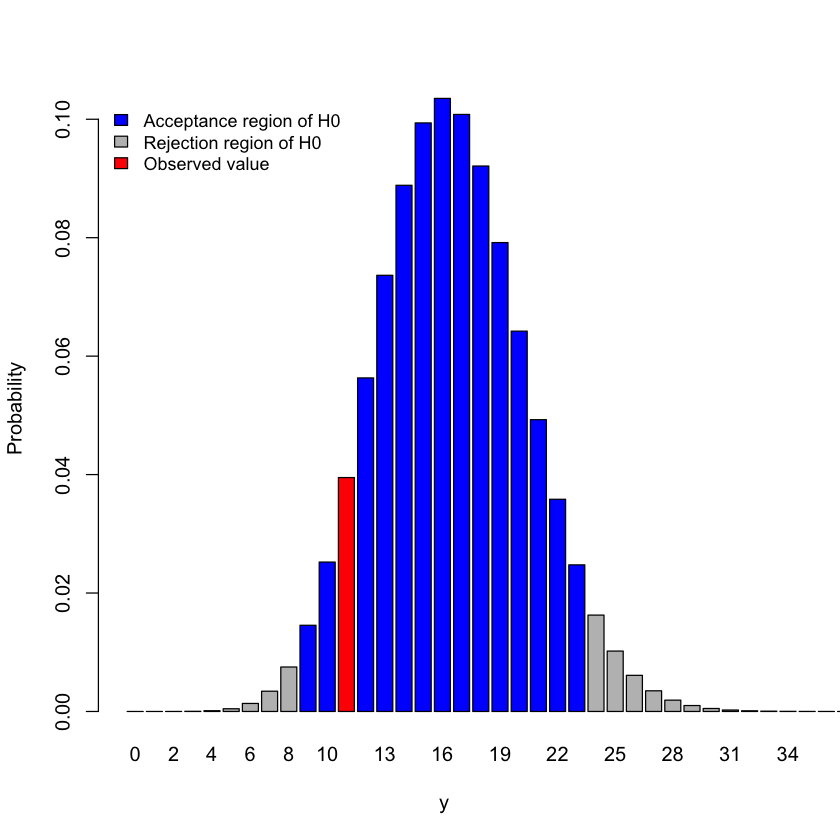

In [376]:
# h) test the hypotesis H0 vs H1 at 5% level of significance with both the frequentist and bayesian approach

#frequentist approach

p.H0<-0.1
y<-seq(0,n)

H0<-dbinom(y,n,p.H0)
area.H0<-cumsum(H0)

cl<-0.95

x.H0<-cl.func.discr(y,area.H0,cl)

cat("\n * Confidance Level = 0.95: \n")
cat("x1 =",x.H0[1], "\t x2 =",x.H0[2],"\n")
cat("area 1:", x.H0[3],"\n")
cat("area 2:", x.H0[4],"\n")
cat("alpha:",x.H0[3]+x.H0[4],"\n")
cat("\n")

output.freq(Y)

data<-data.frame(H0)

cols<-c("blue","grey")
pos <- (y <=x.H0[1] | y>=x.H0[2])

barplot(H0,names=y,xlim=c(0,40),col=ifelse(y==11,"red",cols[pos+1]),xlab="y",ylab="Probability")
legend("topleft",legend=c("Acceptance region of H0","Rejection region of H0","Observed value"),
       fill=c("blue","grey","red"),cex=0.9,box.lty=0)



 * Confidance Level = 0.95: 
x1 = 0.04477239 	 x2 = 0.1038019 

The null hypotesis H0 is accepted.

Warning message:
“Removed 1460 row(s) containing missing values (geom_path).”


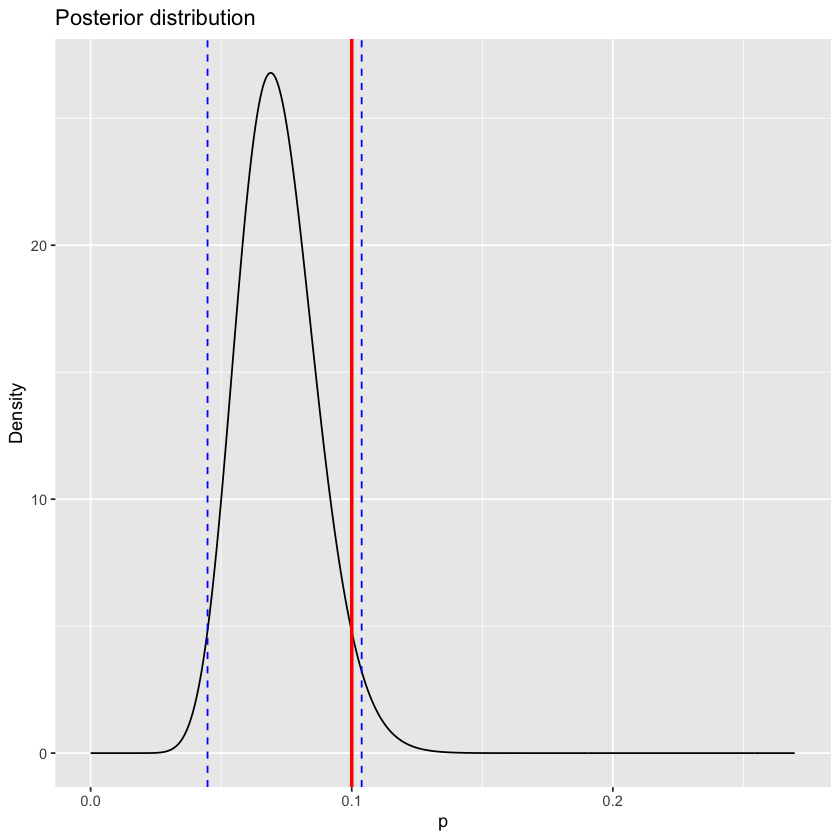

In [377]:
#bayesian approach

cat("\n * Confidance Level = 0.95: \n")
cat("x1 =",x.post[1], "\t x2 =",x.post[2],"\n")
cat("\n")

output.bayes(p.H0)

options(repr.plot.width=7, repr.plot.height=7)
ggplot()+
    geom_line(aes(p,posterior))+
    geom_vline(xintercept = x.post[1],color="blue",linetype="dashed")+
    geom_vline(xintercept = x.post[2],color="blue",linetype="dashed")+
    geom_vline(xintercept = p.H0,color="red",lwd=1)+
    xlim(0,0.27)+
    labs(title="Posterior distribution",x="p",y="Density")

### Exercise 4

Analyze the data of Exercise 1 using a MCMC with JAGS (solve only point c) of Ex 1).

In [378]:
cat("
    model{
        #data likelihood
        X ~ dbin(p,n)
        
        #beta prior
        p ~ dbeta(a,b)
        
    }",
    file="binomial_model.bug")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0838350      0.0308690      0.0003087      0.0004203 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.03352 0.06170 0.08039 0.10238 0.15427 



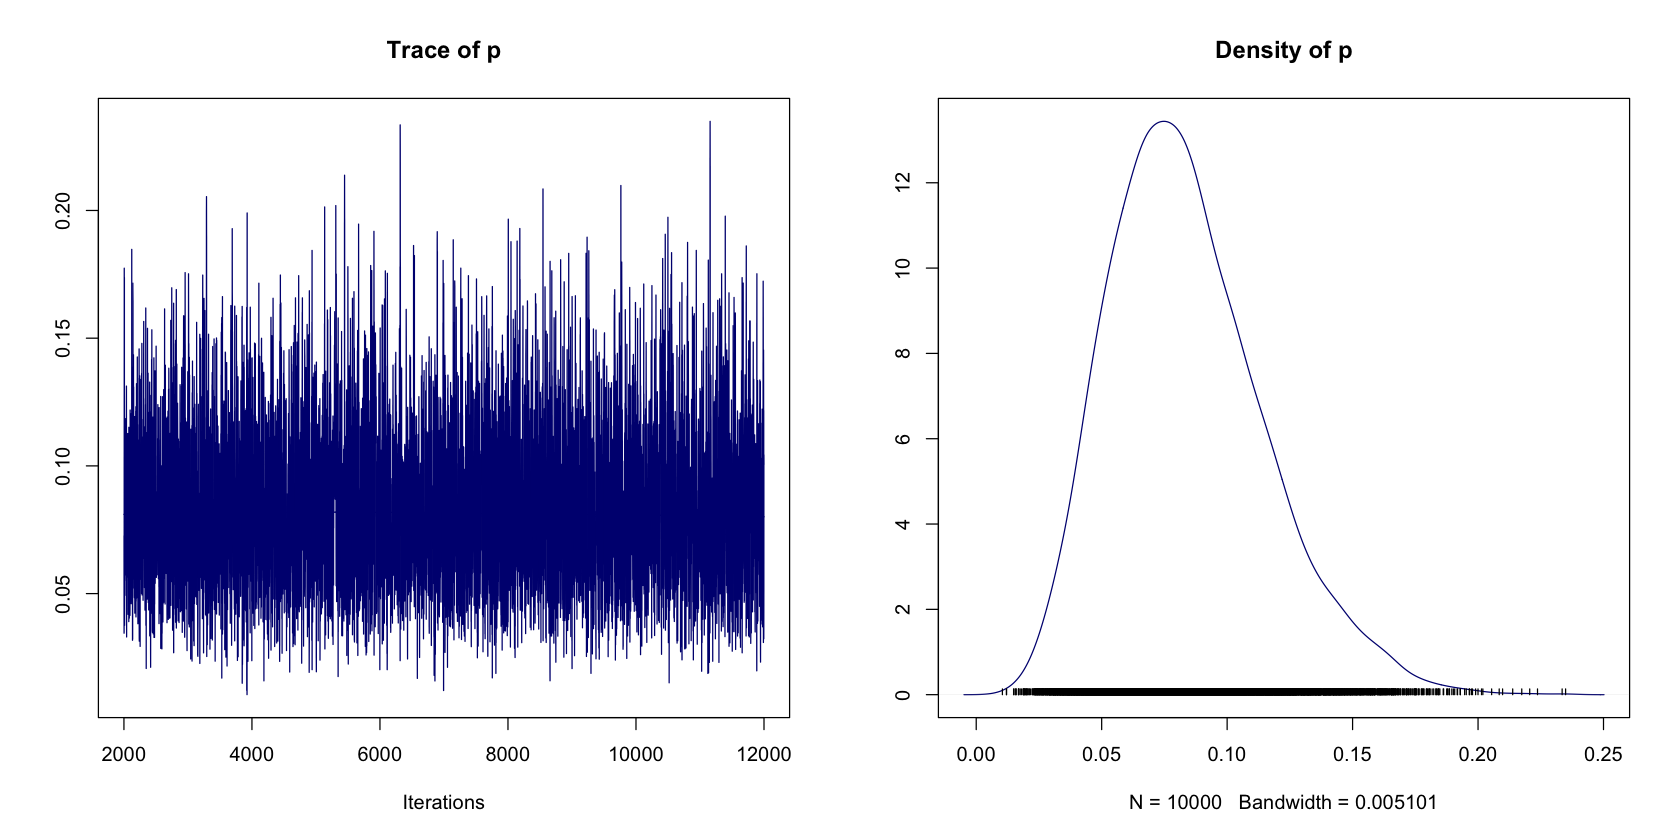

In [379]:
data <- NULL
data$X <- 6
data$n<-75
data$a<-0.8257653
data$b<-4.679337

model<-"binomial_model.bug"
jm <- jags.model(model, data)

update(jm, 1000)
chain <- coda.samples(jm, "p", n.iter=10000)

options(repr.plot.width=14, repr.plot.height=7)
plot(chain, col="navy")

print(summary(chain))

### Exercise 5

Analyze the data of Exercise 2 using a MCMC with JAGS.

In [380]:
cat("
    model{
        #data likelihood
        for(i in 1:length(X)){
            X[i] ~ dpois(lambda)
        }
        
        #beta prior
        lambda ~ dexp(1e-6)
        
    }",
    file="poisson_uniform_model.bug")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 12
   Unobserved stochastic nodes: 1
   Total graph size: 14

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      40.01231        1.81447        0.01814        0.01814 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
36.55 38.77 39.98 41.21 43.68 



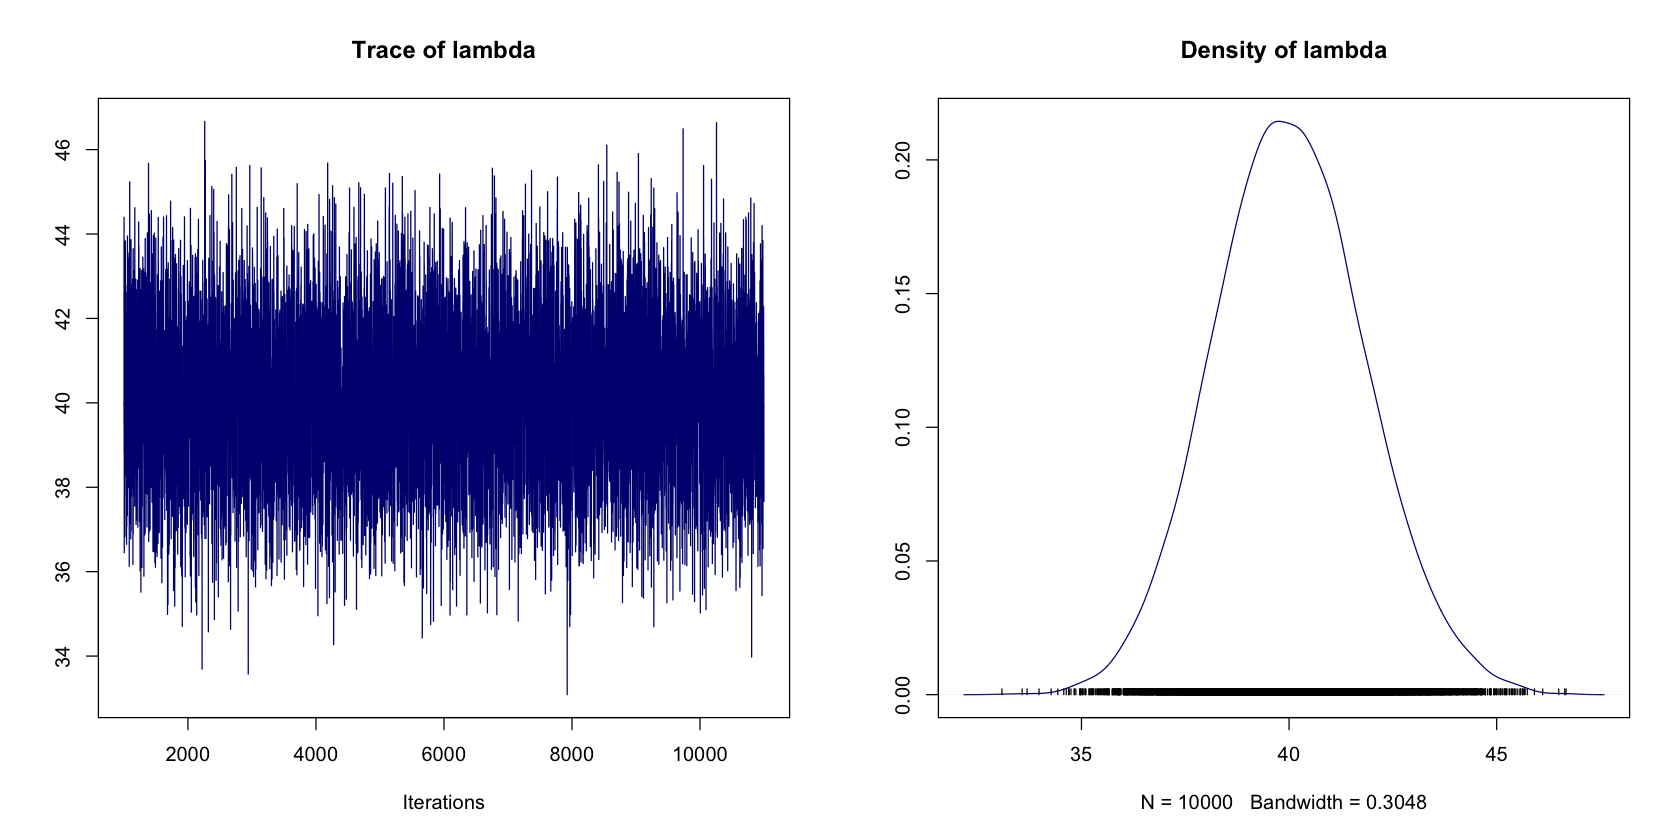

In [381]:
data <- NULL
data$X <- c(ob.one,ob.two)

model<-"poisson_uniform_model.bug"
jm <- jags.model(model, data)

update(jm, 1000)
chain <- coda.samples(jm, "lambda", n.iter=10000)

options(repr.plot.width=14, repr.plot.height=7)
plot(chain, col="navy")

print(summary(chain))

In [382]:
cat("
    model{
        #data likelihood
        for(i in 1:length(X)){
            X[i] ~ dpois(lambda)
        }
        
        #jeffreys prior
        lambda ~ dgamma(a,b)
        
    }",
    file="poisson_jeff_model.bug")

Warning message in jags.model(model, data):
“Unused variable "a" in data”
Warning message in jags.model(model, data):
“Unused variable "b" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 12
   Unobserved stochastic nodes: 1
   Total graph size: 14

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      40.01037        1.81436        0.01814        0.01865 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
36.57 38.78 39.96 41.19 43.68 



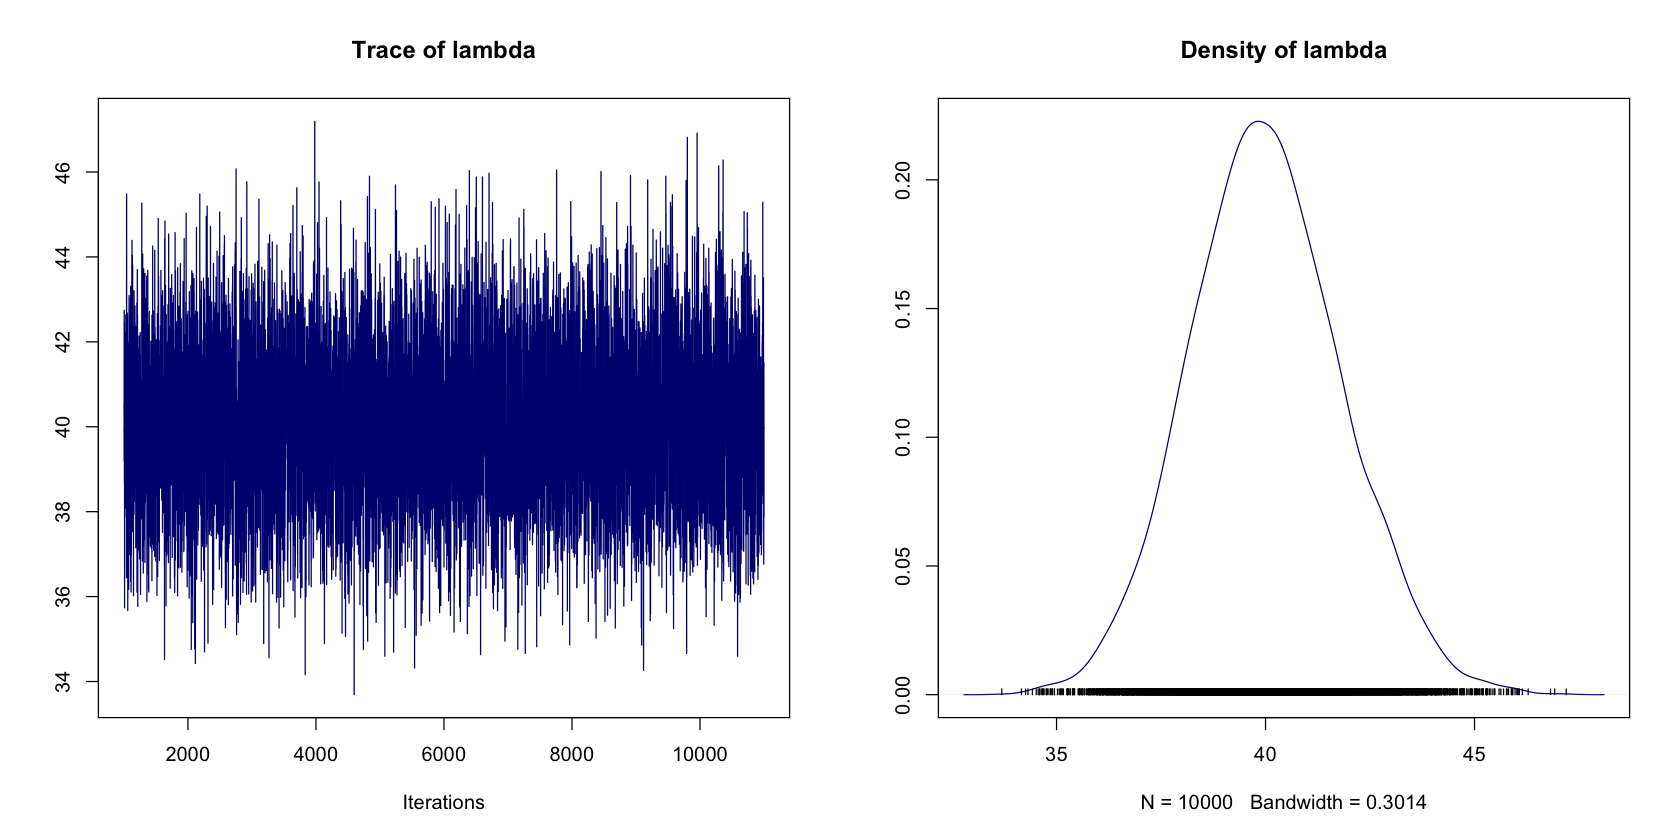

In [383]:
data <- NULL
data$X <- c(ob.one,ob.two)
data$a<-479.5
data$b<-479

model<-"poisson_uniform_model.bug"
jm <- jags.model(model, data)

update(jm, 1000)
chain <- coda.samples(jm, "lambda", n.iter=10000)

options(repr.plot.width=14, repr.plot.height=7)
plot(chain, col="navy")

print(summary(chain))

### Exercise 6

Analyze the data of Exercise 3 using a MCMC with JAGS (solve point b) and c)).

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0941998      0.0260673      0.0002607      0.0003388 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.04913 0.07599 0.09199 0.11028 0.15043 



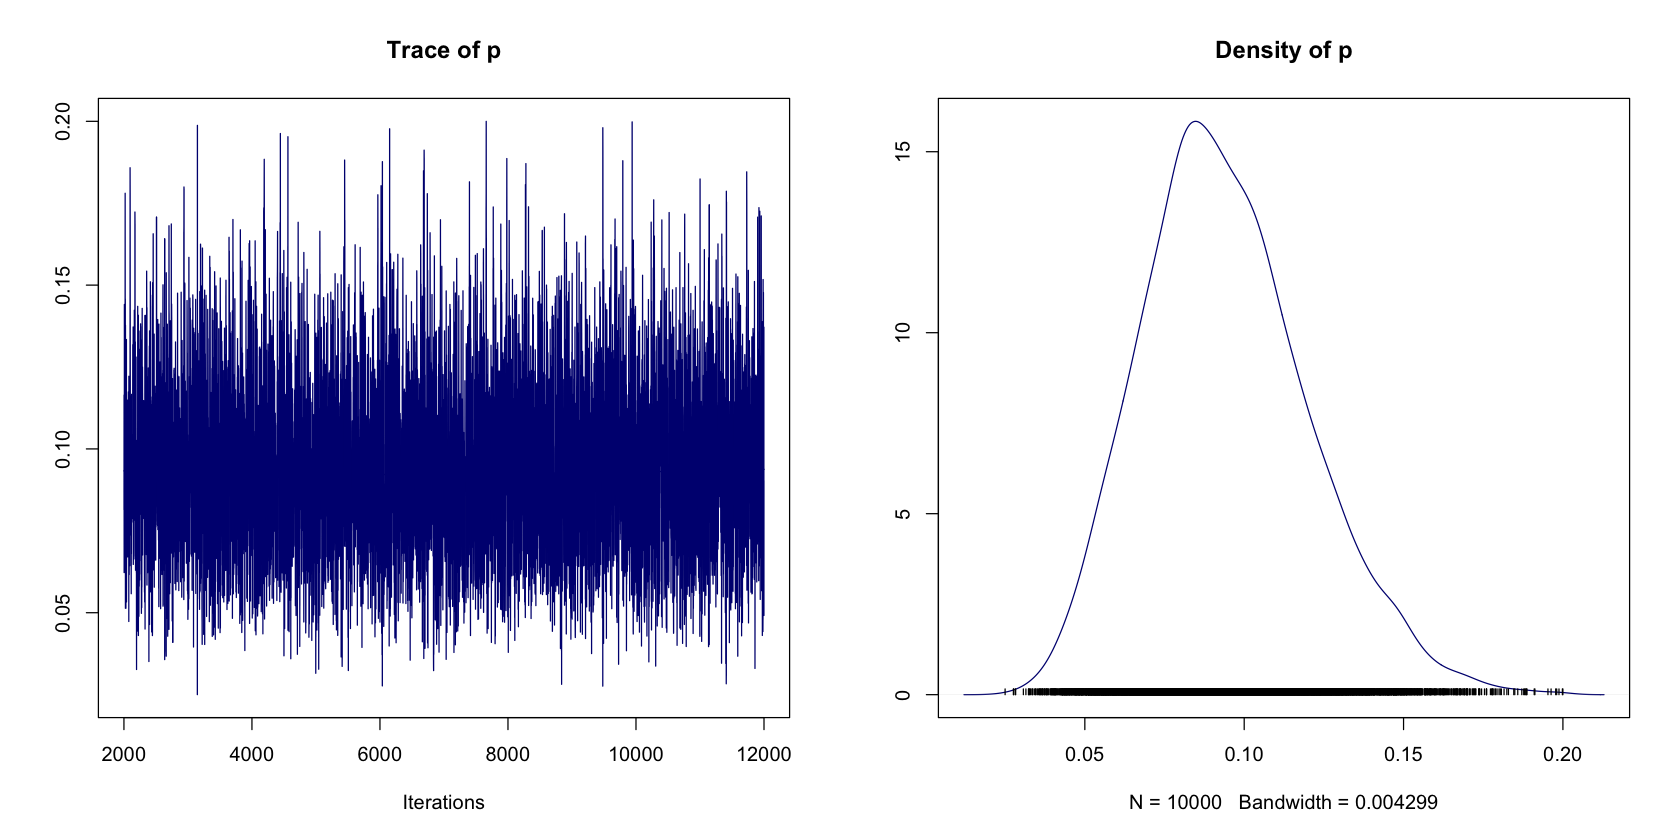

In [384]:
data <- NULL
data$X <- 11
data$n<-116
data$a<-1
data$b<-10

model<-"binomial_model.bug"
jm <- jags.model(model, data)

update(jm, 1000)
chain <- coda.samples(jm, "p", n.iter=10000)

options(repr.plot.width=14, repr.plot.height=7)
plot(chain, col="navy")

print(summary(chain))

Bayesian estimator:	 0.09429189 
Expected value:		 0.09429189 
Variance:		 0.0006848352

 * Confidance Level = 0.95: 
p1 = 0.04852291 	 p2 = 0.1506391 


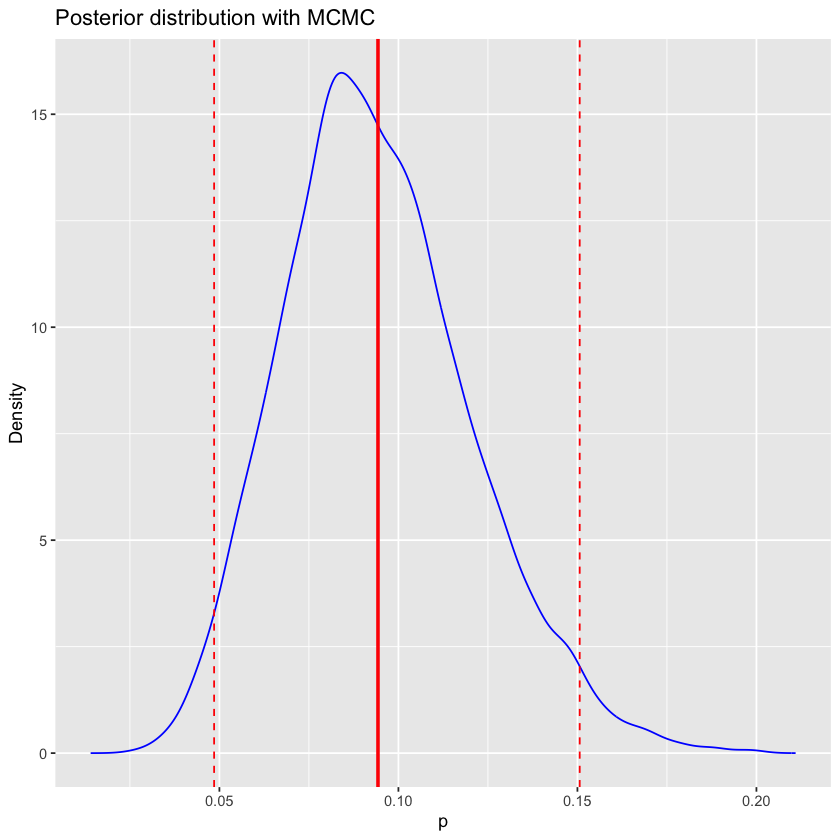

In [385]:
chain.df <- as.data.frame(as.mcmc(chain))

p.post<-density(chain.df[[1]])
p.post.delta<-p.post$x[2]-p.post$x[1]
p.post.mean<-p.post.delta * sum(p.post$x * p.post$y)
p.post.var<-p.post.delta * sum((p.post$x^2) * p.post$y) - (p.post.delta * sum(p.post$x * p.post$y))^2

cat("Bayesian estimator:\t",p.post.mean,"\n")
cat("Expected value:\t\t",p.post.mean,"\n")
cat("Variance:\t\t", p.post.var)
cat("\n")

cl=0.95
p.post.area<-p.post.delta*cumsum(p.post$y)
p.cl<-cl.func(p.post$x,p.post.area,cl)

cat("\n * Confidance Level = 0.95: \n")
cat("p1 =",p.cl[1], "\t p2 =",p.cl[2],"\n")

options(repr.plot.width=7, repr.plot.height=7)
ggplot()+
    geom_line(aes(p.post$x,p.post$y),color="blue")+
    geom_vline(xintercept = p.post.mean,color="red",lwd=1)+
    geom_vline(xintercept = p.cl[1],color="red",linetype="dashed")+
    geom_vline(xintercept = p.cl[2],color="red",linetype="dashed")+
    labs(title="Posterior distribution with MCMC",x="p",y="Density")